In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
X = np.array([0, 2, 3, 4])
y = np.array([1, 3, 6, 8])
b1, b0 = 62. / 35, 18. / 35

In [3]:
# generate random data points
mean, std, sampleSize = 0, 1, 100
noise = np.random.normal(mean, std, sampleSize).reshape(-1, 1)

X_space = np.linspace(-1, 5, num=100).reshape(-1, 1)
y_space = (b1 * X_space + b0).reshape(-1, 1)

X_space_stacked = np.hstack((np.ones_like(y_space), X_space))
y_space_rand = b1 * X_space + b0 + noise

In [4]:
# predict y with new weights
X_space_stacked = np.hstack((np.ones_like(y_space), X_space))
W_opt = np.linalg.solve(X_space_stacked.T @ X_space_stacked, X_space_stacked.T @ y_space_rand)
b_rand_opt, m_rand_opt = W_opt.item(0), W_opt.item(1)
y_pred_rand = np.array([m_rand_opt * x + b_rand_opt for x in X_space]).reshape(-1, 1)

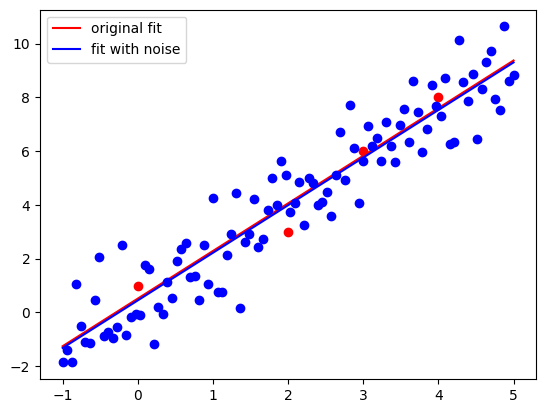

In [5]:
plt.plot(X, y, 'ro')

orig_plot, = plt.plot(X_space, y_space, 'r')
plt.plot(X_space, y_space_rand, 'bo')

rand_plot, = plt.plot(X_space, y_pred_rand, 'b')
plt.legend((orig_plot, rand_plot), ('original fit', 'fit with noise'), loc = 'best')

plt.savefig('./p2d.png', format='png')